In [16]:
import subprocess
import sqlite3
import pandas as pd

In this lab, we aligned input reads against a Shewanella oneidensis reference genome using bowtie2 and samtools packages.  We found it easier to use the terminal for this lab and copied our commands into this notebook.

Below is the filtering of the input reads against the human genome database hg19, using the illumina_reads fastq.  unaligned.fastq contains the non-contaminated reads.

```
be131-23@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /../../data/hg19/hg19 -U /../../data/lab6/illumina_reads.fastq -S output.sam --un unaligned.fastq
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate
```

Below is alignment of filtered reads against Shewanella oneidensis genome.  unaligned.fastq contains reads that don't align to the reference genome.  After that, we tried sequencing on --very-sensitive and received slightly higher alignment rate.

```
be131-23@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /../../data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -S output.sam --un new_unaligned.fastq
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate
```

```
be131-23@meowth:~$ bowtie2 -p 4 --very-sensitive --no-unal -x /../../data/lab6/shewanella_oneidensis_mr-1 -U unaligned.fastq -Soutput_sens.sam --un new_unaligned.fastq
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    298112 (28.99%) aligned 0 times
    688180 (66.92%) aligned exactly 1 time
    42087 (4.09%) aligned >1 times
71.01% overall alignment rate
```

In the following samtools commands, we convert SAM to BAM, sort the BAM file by coordinates, generate an index by alignment coordinates, then create a .tab file with a list of coordinates and the number of times a read is aligned to that position.

```
be131-23@meowth:~$ samtools view -b output_sens.sam > output_sens.bam
be131-23@meowth:~$ samtools sort output_sens.bam > output_sens.sorted.bam
be131-23@meowth:~$ samtools index output_sens.sorted.bam
be131-23@meowth:~$ samtools depth output_sens.sorted.bam > depths.tab
```

In [20]:
depths = pd.read_csv('depths.tab', sep='\t', lineterminator='\n', header = None, names = ['Read', 'Position', 'Depth'])

In [81]:
import numpy as np
print('Mean: ' + str(np.mean(depths['Depth'])))
print('Max: ' + str(max(depths['Depth'])))
print('Min: ' + str(min(depths['Depth'])))

Mean: 37.03933156165406
Max: 281
Min: 1


The values listed above are the mean, max, and min values for the depths of coverage.

In [22]:
import matplotlib.pyplot as plt

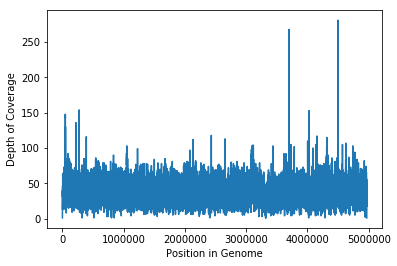

In [83]:
x = depths['Position']
y = depths['Depth']
plt.xlabel('Position in Genome') 
plt.ylabel('Depth of Coverage') 
plt.plot(x, y)

(array([  1446.,   6726.,  18560.,  32735.,  53691.,  89716., 142841.,
        228731., 324900., 415869., 489804., 533525., 537644., 495315.,
        422024., 335418., 250872., 186646., 128915.,  89253.,  59472.,
         35795.,  23622.,  15145.,  10815.,   8503.,   6286.,   4897.,
          3626.,   2474.,   1977.,   1615.,   2037.]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]),
 <a list of 33 Patch objects>)

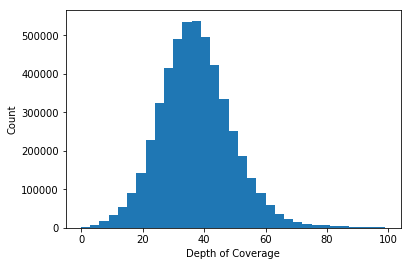

In [84]:
plt.xlabel('Depth of Coverage')
plt.ylabel('Count')
plt.hist(y, bins=[x for x in range(102) if x % 3 == 0], range = 100)